In [20]:
# Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random


In [32]:
# 10000 users and 10 ads
# 1 if user will click on ad, 0 if not
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/MAR6669-data/Ads_Optimisation.csv')
print(dataset.shape)
dataset.head()

(10000, 10)


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
# Implementing Random Selection
def random_selection(seed):
    random.seed(seed)
    N = 10000
    d = 10
    ads_selected = []
    total_reward = 0
    for n in range(0, N):
        ad = random.randrange(d)
        ads_selected.append(ad)
        # chooses the value at index ad in the nth row of the dataset where there are 10000 rows 
        reward = dataset.values[n, ad]
        total_reward = total_reward + reward
    return total_reward


In [7]:
# Observe reward of choosing ads randomly and never exploiting the optimal one
random_result = random_selection(seed=123)
print(random_result)

1255


In [33]:
# Epsilon Greedy Approach
def epsilon_greedy(epsilon, seed):
    random.seed(seed)
    np.random.seed(seed)
    
    N = 10000
    d = 10
    ads_selected = []
    numbers_of_selections = [0] * d # keep track of how many times each ad are taken
    sums_of_reward = [0] * d # keep track of the sum of rewards of each ad
    total_reward = 0
    
    # loop over n respondents  
    for n in range(0, N):
        ad = 0
        max_q_value = 0
        rand = np.random.uniform(0, 1)
        if rand <= epsilon: 
            ad = random.randrange(d) #random arm
        else:
            for i in range(0, d): #find the best arm so far
                if (numbers_of_selections[i] > 0):
                    q_val = sums_of_reward[i] / numbers_of_selections[i]
                    if q_val > max_q_value:
                        max_q_value = q_val
                        ad = i   
        ads_selected.append(ad)
        numbers_of_selections[ad] += 1
        reward = dataset.values[n, ad]
        sums_of_reward[ad] += reward
        total_reward += reward
    return [total_reward,sums_of_reward]

In [34]:
# Observe reward of choosing ads according to an epsilon-greedy policy
epsilon_result = epsilon_greedy(0.1, seed=123)
print(epsilon_result[0])

2541


Text(0.5, 1.0, 'exploitation-exploration tradeoff')

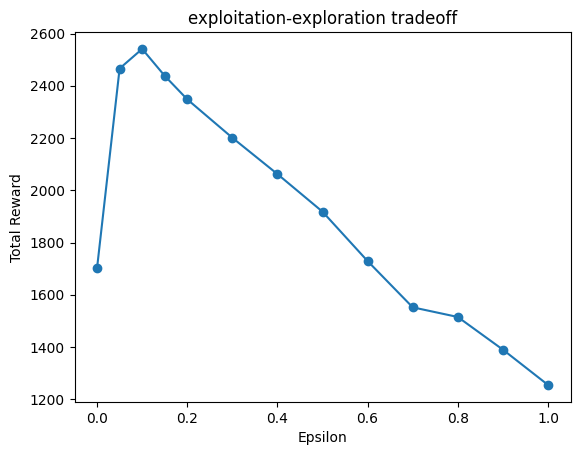

In [35]:
all_eps = [0, 0.05, 0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1] #exploitation --> 0, exploration --> 1
all_rewards = [epsilon_greedy(eps, seed=123)[0] for eps in all_eps]
plt.plot(all_eps, all_rewards, 'o-')
plt.xlabel('Epsilon')
plt.ylabel('Total Reward')
plt.title('exploitation-exploration tradeoff')

In [41]:
# Find the best Ads
print(1+np.argmax(epsilon_result[1]))

5


In [40]:
dataset.sum(axis=0)

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64